# Startup Success Prediction Model

 ## Problem Statement

**Startups** are rapidly transforming the global economic and technological landscape. These nascent companies, often founded with minimal resources but abundant innovative ideas, face extreme volatility in their early stages. For Venture Capitalists (VCs) and retail investors alike, monitoring the performance of startups and accurately predicting their potential for long-term success has become a paramount challenge.<br><br>


## Methodology
Given the high failure rate of startups and the fast-paced changes within their operating environments, traditional evaluation methods (such as basic financial ratios or market share estimates) are no longer sufficient. Instead, cutting-edge AI techniques like Neural Networks (ANNs), Convolutional Neural Networks (CNNs), Long Short-Term Memory (LSTM), and Generative Adversarial Networks (GANs) offer new avenues to build highly accurate predictive models. These models analyze complex interdependencies and non-linear patterns in startup data, leveraging structured and unstructured sources (e.g., financial reports, market sentiment, and social media insights) to forecast success.
<br><br>

## Goal
The primary goal is to leverage state-of-the-art AI models and build a multi-faceted framework that predicts the likelihood of startup success, enabling VCs and other investors to make data-driven funding decisions with a higher degree of confidence.
<br><br>

## Objective
The objective is to analyze startup behavior based on several variables, determine what variables affect startup success the most, then build a model that can predict the success of a StartUp.
<br><br>

## Key Components:

*   Building a Multi-Model AI Pipeline. The pipeline will consist of:

    Artificial Neural Networks (ANNs): For multi-layered pattern recognition of core financials and team dynamics.

    Convolutional Neural Networks (CNNs): To extract spatial relationships in structured data and detect unique patterns in time-series startup performance metrics.

    Long Short-Term Memory (LSTM) Networks: For temporal modeling, which captures the time-dependent nature of startup growth and market changes, forecasting the startup’s trajectory over time.

    Generative Adversarial Networks (GANs): To simulate potential future scenarios, where the generator creates synthetic startup success/failure outcomes, and the discriminator evaluates how realistic these outcomes are.
    
    Monte Carlo Simulations: For probabilistic forecasting, running hundreds of thousands of simulations to estimate the likelihood of future outcomes under varying market conditions.
    <br>
    <br>


*   Generative Adversarial Networks (GANs): The model employs GANs to generate realistic future outcomes by learning from existing data. This approach allows for the exploration of potential scenarios that startups might encounter, offering a rich dataset for further analysis.

*   Reinforcement Learning (RL): By integrating RL, the system dynamically optimizes startup strategies based on simulated outcomes. This enables startups to adapt their decisions in real time, enhancing their chances of success.


*   XGBoost Models: Utilizing XGBoost, the model provides powerful predictive capabilities by analyzing various features to estimate success probabilities.

*   Gradient Boosting Models: These models further refine predictions by leveraging ensemble techniques, improving the robustness and accuracy of the forecasts.


*   AdaBoost Models: AdaBoost is employed to enhance the predictive performance of the model through boosting weak classifiers, ensuring that the system remains adaptive to varying conditions.

*   TensorFlow Model: The inclusion of TensorFlow allows for the implementation of deep learning architectures that can uncover complex patterns in the data, contributing to more accurate success predictions.


*   Sklearn Model Using Intel's OneAPI: To optimize performance and efficiency, the project incorporates Scikit-learn models enhanced by Intel's OneAPI, ensuring that the model runs effectively on various hardware configurations.


# Data Exploration

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')


## Load Dataset

In [ ]:
import csv
import numpy as np

def remove_commas_and_convert_columns_to_float(input_file, output_file, target_columns):
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        header = next(reader)
        writer.writerow(header)

        for row in reader:
            new_row = []
            for i, col in enumerate(row):
                if i in target_columns:
                    if col == '' or col.lower() == 'nan' or col.lower() == 'unknown' or col == 'NaN':
                        new_row.append(np.nan)
                    else:
                        try:
                            clean_col = col.replace(',', '').replace('%', '')

                            if 'Cr' in clean_col:
                                clean_col = clean_col.replace('Cr', '')  # Remove 'Cr'
                            elif 'Lacs' in clean_col:
                                clean_col = clean_col.replace('Lacs', '')  # Remove 'Lacs'
                                clean_col = str(np.float64(clean_col) / 100)  # Divide by 100 for 'Lacs'


                            value = np.float64(clean_col)

                            if np.isnan(value):
                                value = np.nan

                            new_row.append(value)
                        except ValueError:
                            new_row.append(np.nan)
                else:
                    new_row.append(col)
            writer.writerow(new_row)

input_csv = '/content/changedbillion.csv'
output_csv = 'output.csv'
columns_to_modify = [2, 6, 9, 10, 12, 13]

remove_commas_and_convert_columns_to_float(input_csv, output_csv, columns_to_modify)
print(f"Processed CSV written to {output_csv}")


Processed CSV written to output.csv


In [ ]:
df = pd.read_csv('/content/output.csv')  #[7, 13,14,15,16,17,19,20]

In [ ]:
df.head(10)

,CompanyName,Headquarters,Employees,Industry,Founded At,Status,Total Funding,Funding Rounds,Number of Acquisitions,FY 2022-23 Revenue,Profit_Loss,Latest Funding Round,FY 2022-23 Expenses,Net Cash Flow From Operations,Score A,Score B,Score C
0,1Bridge,Bengaluru,43.0,Consumer Tech,2016,Active,24.4200,4,1.0,72.390,-6.590000,Seed,78.9800,-4.6400,NaN,6.40,8.00
1,1K Kirana Bazaar,Gurugram,985.0,E-commerce,2018,Active,300.6200,4,NaN,224.080,-182.530000,Series B,407.7000,-187.5000,NaN,3.70,8.25
2,21K School,Bengaluru,1027.0,EdTech,2020,Active,38.0400,2,NaN,33.280,-25.990000,Seed,59.2800,-22.8900,7.30,3.60,7.90
3,5C Network,Bengaluru,125.0,Healthcare,2016,Active,83.5900,7,1.0,18.750,-19.470000,Series B,38.1900,-16.8200,7.67,5.67,7.50
4,5ire,Noida,129.0,"Blockchain,",2021,Active,954.9600,2,NaN,19000.000,-0.000078,Series A,26800.0000,NaN,9.25,4.83,7.88
5,60Plus India,Chennai,9.0,Healthcare,2021,Active,0.7695,1,NaN,0.574,-0.127300,Seed,0.7013,NaN,6.50,7.00,6.63
6,6Degree,Mumbai,79.0,E-commerce,2015,Active,23.4000,10,NaN,12.540,-3.720000,Seed,NaN,NaN,7.75,6.50,7.50
7,91Squarefeet,Gurugram,159.0,"Enterprise Tech,",2019,Active,87.7000,3,NaN,67.900,-17.520000,Series A,80.9200,NaN,8.00,6.50,7.50
8,A23,Delhi,40.0,Gaming,2005,Active,7.8600,3,NaN,1072.180,58.020000,Seed,975.8800,129.9200,8.00,8.50,7.75
9,Aadyah Aerospace,Bengaluru,88.0,Space Tech,2016,Active,19.5000,1,NaN,14.800,3.420000,Series A,11.2300,-0.9956,7.50,8.20,8.00


## Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CompanyName                    617 non-null    object 
 1   Headquarters                   617 non-null    object 
 2   Employees                      616 non-null    float64
 3   Industry                       617 non-null    object 
 4   Founded At                     617 non-null    int64  
 5   Status                         617 non-null    object 
 6   Total Funding                  609 non-null    float64
 7   Funding Rounds                 617 non-null    int64  
 8   Number of Acquisitions         85 non-null     float64
 9   FY 2022-23 Revenue             606 non-null    float64
 10  Profit_Loss                    617 non-null    float64
 11  Latest Funding Round           617 non-null    object 
 12  FY 2022-23 Expenses            534 non-null    flo

## Data type identification

In [ ]:
df.columns

Index(['CompanyName', 'Headquarters', 'Employees', 'Industry', 'Founded At',
       'Status', 'Total Funding', 'Funding Rounds', 'Number of Acquisitions',
       'FY 2022-23 Revenue', 'Profit_Loss', 'Latest Funding Round',
       'FY 2022-23 Expenses', 'Net Cash Flow From Operations', 'Score A',
       'Score B', 'Score C'],
      dtype='object')

## Data numeric

In [ ]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Employees,Founded At,Total Funding,Funding Rounds,Number of Acquisitions,FY 2022-23 Revenue,Profit_Loss,FY 2022-23 Expenses,Net Cash Flow From Operations,Score A,Score B,Score C
0,43.0,2016,24.42,4,1.0,72.39,-6.59,78.98,-4.64,NaN,6.4,8.00
1,985.0,2018,300.62,4,NaN,224.08,-182.53,407.70,-187.50,NaN,3.7,8.25
2,1027.0,2020,38.04,2,NaN,33.28,-25.99,59.28,-22.89,7.3,3.6,7.90


## Data categorical

In [ ]:
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,CompanyName,Headquarters,Industry,Status,Latest Funding Round
0,1Bridge,Bengaluru,Consumer Tech,Active,Seed
1,1K Kirana Bazaar,Gurugram,E-commerce,Active,Series B
2,21K School,Bengaluru,EdTech,Active,Seed


### Changing 'status' data value

In [ ]:
df['Status'] = df['Status'].map({'Acquired': 1, 'Shut Down': 0}).fillna(1)
df.to_csv('output.csv', index=False)

### Handling 'status' data type to int

In [ ]:
df['Status'] = df['Status'].fillna(0).astype(int) # Fill NaN values with 0 and convert to int
df.to_csv('output.csv', index=False)

# Exploratory Data Analysis

## Numerical Approach

### Statistical Summary

In [ ]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Employees,616.000000,505.946429,2287.790189,2.000000,32.000000,85.500000,294.500000,46705.000000
Founded At,617.000000,2016.160454,6.202628,1960.000000,2015.000000,2017.000000,2020.000000,2023.000000
Status,617.000000,0.991896,0.089728,0.000000,1.000000,1.000000,1.000000,1.000000
Total Funding,609.000000,619.392492,3936.954223,0.100000,12.210000,63.870000,307.590000,92492.340000
Funding Rounds,617.000000,4.424635,3.714386,1.000000,2.000000,3.000000,6.000000,29.000000
Number of Acquisitions,85.000000,3.305882,3.792296,1.000000,1.000000,2.000000,4.000000,21.000000
FY 2022-23 Revenue,606.000000,645.683171,4251.454694,0.013600,2.660000,17.710000,129.155000,73720.000000
Profit_Loss,617.000000,-46.331115,241.846751,-4026.500000,-25.990000,-4.420000,-0.519900,1061.860000
FY 2022-23 Expenses,534.000000,519.547492,3709.889006,0.041400,5.482500,27.595000,153.775000,69726.000000
Net Cash Flow From Operations,407.000000,-69.697610,295.904227,-2663.100000,-62.260000,-13.360000,-1.540000,1720.470000


In [ ]:
describeNumCat = df.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
CompanyName,617,617,1Bridge,1
Headquarters,617,31,Bengaluru,183
Industry,617,85,Fintech,79
Latest Funding Round,617,38,Seed,207


- Does the value listed on each column make sense?
- age_first_funding_year and age_last_funding_year have the same min,max data, need to be checked again
- Is the maximum/minimum value still within the reasonable limit?
- Min/max that is too far from the mean/median may be an indication of data input error
- Is there a column with a significant difference between the mean and the median?
- Differences between mean/median indicate outlier or skewed distribution

## Missing Value

In [ ]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values
Employees,1,0.162075
Total Funding,8,1.296596
Number of Acquisitions,532,86.223663
FY 2022-23 Revenue,11,1.782820
FY 2022-23 Expenses,83,13.452188
Net Cash Flow From Operations,210,34.035656
Score A,122,19.773096
Score B,120,19.448947
Score C,120,19.448947


In [ ]:
# Checking Missing Values Column
df[['Headquarters', 'Employees', 'Industry', 'Founded At',
       'Status', 'Total Funding', 'Funding Rounds', 'Number of Acquisitions',
       'FY 2022-23 Revenue', 'Profit_Loss', 'Latest Funding Round',
       'FY 2022-23 Expenses', 'Net Cash Flow From Operations']].head(4)

,Headquarters,Employees,Industry,Founded At,Status,Total Funding,Funding Rounds,Number of Acquisitions,FY 2022-23 Revenue,Profit_Loss,Latest Funding Round,FY 2022-23 Expenses,Net Cash Flow From Operations
0,Bengaluru,43.0,Consumer Tech,2016,1,24.42,4,1.0,72.39,-6.59,Seed,78.98,-4.64
1,Gurugram,985.0,E-commerce,2018,1,300.62,4,NaN,224.08,-182.53,Series B,407.70,-187.50
2,Bengaluru,1027.0,EdTech,2020,1,38.04,2,NaN,33.28,-25.99,Seed,59.28,-22.89
3,Bengaluru,125.0,Healthcare,2016,1,83.59,7,1.0,18.75,-19.47,Series B,38.19,-16.82


###  Handling Missing Value Employee

In [ ]:
df['Employees'] = df['Employees'].fillna(df.groupby('Industry')['Employees'].transform('mean'))
remaining_missing = df['Employees'].isna().sum()
print(f"Remaining missing 'Employees' values: {remaining_missing}")

# Optionally, if any are still missing, fill them with a global average or another strategy
df['Employees'] = df['Employees'].fillna(df['Employees'].mean())
df['Employees'] = df['Employees'].astype(int)
df.to_csv('output.csv', index=False)

Remaining missing 'Employees' values: 0


###  Handling Missing Value 'Founded At'


In [ ]:
df['Founded At'] = pd.to_numeric(df['Founded At'], errors='coerce')

# Fill missing 'Founded At' with the average founding year per industry
df['Founded At'] = df['Founded At'].fillna(df.groupby('Industry')['Founded At'].transform('mean'))

# Round the values to get whole years
df['Founded At'] = df['Founded At'].round().astype('Int64')

# Check if any 'Founded At' values are still missing
remaining_missing = df['Founded At'].isna().sum()
print(f"Remaining missing 'Founded At' values: {remaining_missing}")
df.to_csv('output.csv', index=False)

Remaining missing 'Founded At' values: 0


### Handling Missing Value Total Funding

In [ ]:
df['Total Funding'] = df['Total Funding'].replace('undisclosed', pd.NA)

# Drop rows where 'Total Funding' is NaN
df = df.dropna(subset=['Total Funding'])

print(f"Rows with 'undisclosed' or NaN in 'Total Funding' have been dropped. Remaining rows: {len(df)}")
df.to_csv('output.csv', index=False)

Rows with 'undisclosed' or NaN in 'Total Funding' have been dropped. Remaining rows: 609


### Handling Missing Value No. of Acqusitions


In [ ]:
df['Number of Acquisitions'] = df['Number of Acquisitions'].fillna(value="0")
df['Number of Acquisitions'] = df['Number of Acquisitions'].astype(int)
df.to_csv('output.csv', index=False)

### Handling Missing Value No. of Acqusitions




In [ ]:
df['Profit_Loss'] = pd.to_numeric(df['Profit_Loss'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')

# Fill missing 'Profit/Loss' with the average profit/loss per industry
df['Profit_Loss'] = df['Profit_Loss'].fillna(df.groupby('Industry')['Profit_Loss'].transform('mean'))

# Optionally, fill any remaining missing values with the global average
df['Profit_Loss'] = df['Profit_Loss'].fillna(df['Profit_Loss'].mean())

remaining_missing = df['Profit_Loss'].isna().sum()
print(f"Remaining missing 'Profit_Loss' values: {remaining_missing}")
df.to_csv('output.csv', index=False)

Remaining missing 'Profit_Loss' values: 0


In [ ]:
df['Net Cash Flow From Operations'] = pd.to_numeric(df['Net Cash Flow From Operations'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')

# Fill missing 'Net Cash Flow From Operations' with the average cash flow per industry
df['Net Cash Flow From Operations'] = df['Net Cash Flow From Operations'].fillna(df.groupby('Industry')['Net Cash Flow From Operations'].transform('mean'))

# Optionally, fill any remaining missing values with the global average
df['Net Cash Flow From Operations'] = df['Net Cash Flow From Operations'].fillna(df['Net Cash Flow From Operations'].mean())

remaining_missing = df['Net Cash Flow From Operations'].isna().sum()
print(f"Remaining missing 'Net Cash Flow From Operations' values: {remaining_missing}")
df.to_csv('output.csv', index=False)

Remaining missing 'Net Cash Flow From Operations' values: 0


In [ ]:
df['FY 2022-23 Expenses'] = pd.to_numeric(df['FY 2022-23 Expenses'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')

# Fill missing 'FY 2022-23 Expenses' with the average expenses per industry
df['FY 2022-23 Expenses'] = df['FY 2022-23 Expenses'].fillna(df.groupby('Industry')['FY 2022-23 Expenses'].transform('mean'))

# Optionally, fill any remaining missing values with the global average
df['FY 2022-23 Expenses'] = df['FY 2022-23 Expenses'].fillna(df['FY 2022-23 Expenses'].mean())
# Check if any 'FY 2022-23 Expenses' values are still missing

remaining_missing = df['FY 2022-23 Expenses'].isna().sum()
print(f"Remaining missing 'FY 2022-23 Expenses' values: {remaining_missing}")
# Save the updated DataFrame to a new CSV file
df.to_csv('output.csv', index=False)

Remaining missing 'FY 2022-23 Expenses' values: 0


# Data Preprocessing

## Duplicate Values

In [ ]:
#check
duplicate = df[df.duplicated()]

print("Duplicate Rows :")

Duplicate Rows :


## Negative value

In [ ]:
age=["Total Funding","Funding Rounds","Founded At","Status","FY 2022-23 Revenue","FY 2022-23 Expenses"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'Total Funding' column  : False 
Is there any negative value in 'Funding Rounds' column  : False 
Is there any negative value in 'Founded At' column  : False 
Is there any negative value in 'Status' column  : False 
Is there any negative value in 'FY 2022-23 Revenue' column  : False 
Is there any negative value in 'FY 2022-23 Expenses' column  : False 


In [ ]:
df = df.drop(df[df['Total Funding'] < 0].index)
df = df.drop(df[df['Funding Rounds'] < 0].index)
df = df.drop(df[df['Founded At'] < 0].index)
df = df.drop(df[df['FY 2022-23 Revenue'] < 0].index)
df = df.drop(df[df['FY 2022-23 Expenses'] < 0].index)
df.to_csv('output.csv', index=False)

In [ ]:
for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'Total Funding' column  : False 
Is there any negative value in 'Funding Rounds' column  : False 
Is there any negative value in 'Founded At' column  : False 
Is there any negative value in 'Status' column  : False 
Is there any negative value in 'FY 2022-23 Revenue' column  : False 
Is there any negative value in 'FY 2022-23 Expenses' column  : False 


## Outliers

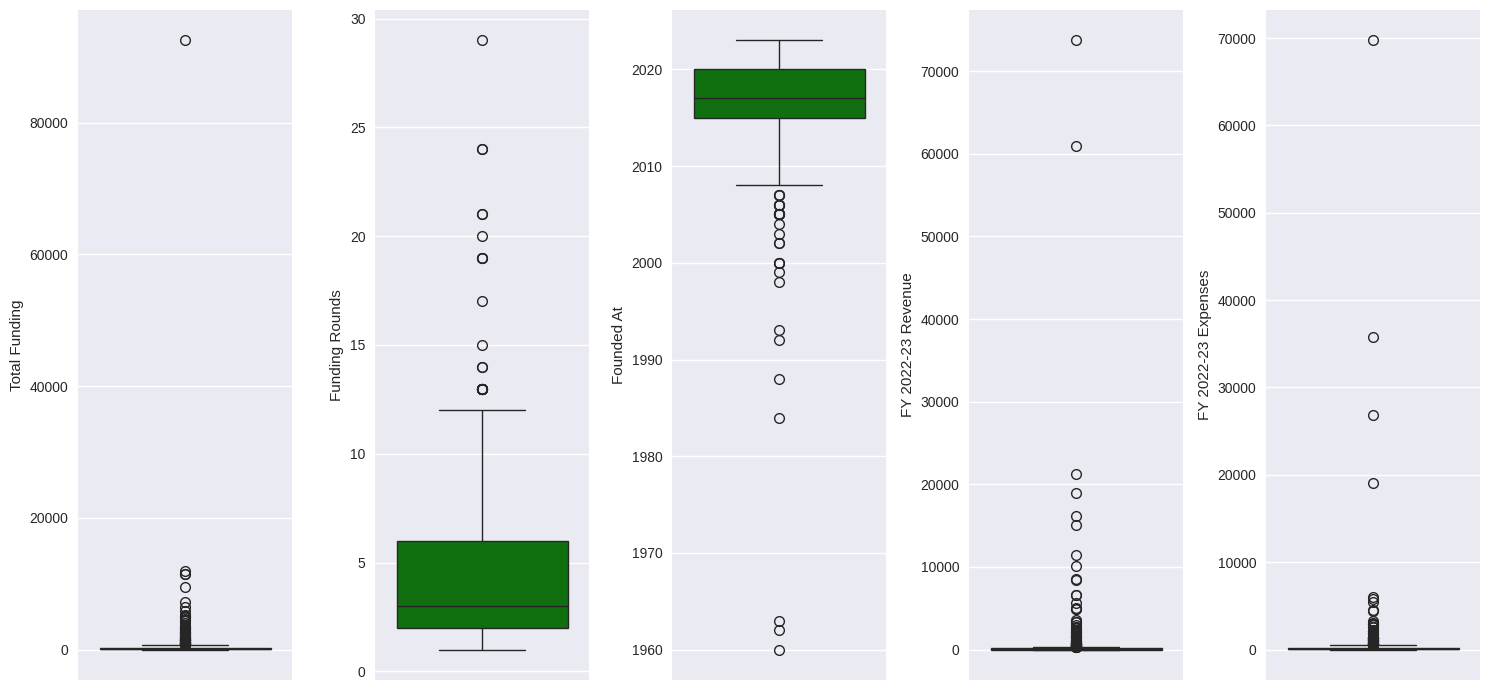

In [ ]:
featuresNumfinal = ['Total Funding','Funding Rounds','Founded At','FY 2022-23 Revenue','FY 2022-23 Expenses']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

## Log-transformation of the funding and milestone year variable

In [ ]:
df["FY 2022-23 Revenue"] = np.log1p(df["FY 2022-23 Revenue"])
df["FY 2022-23 Expenses"] = np.log1p(df["FY 2022-23 Expenses"])
df["Funding Rounds"] = np.log1p(df["Funding Rounds"])
df["Total Funding"] = np.log1p(df["Total Funding"])

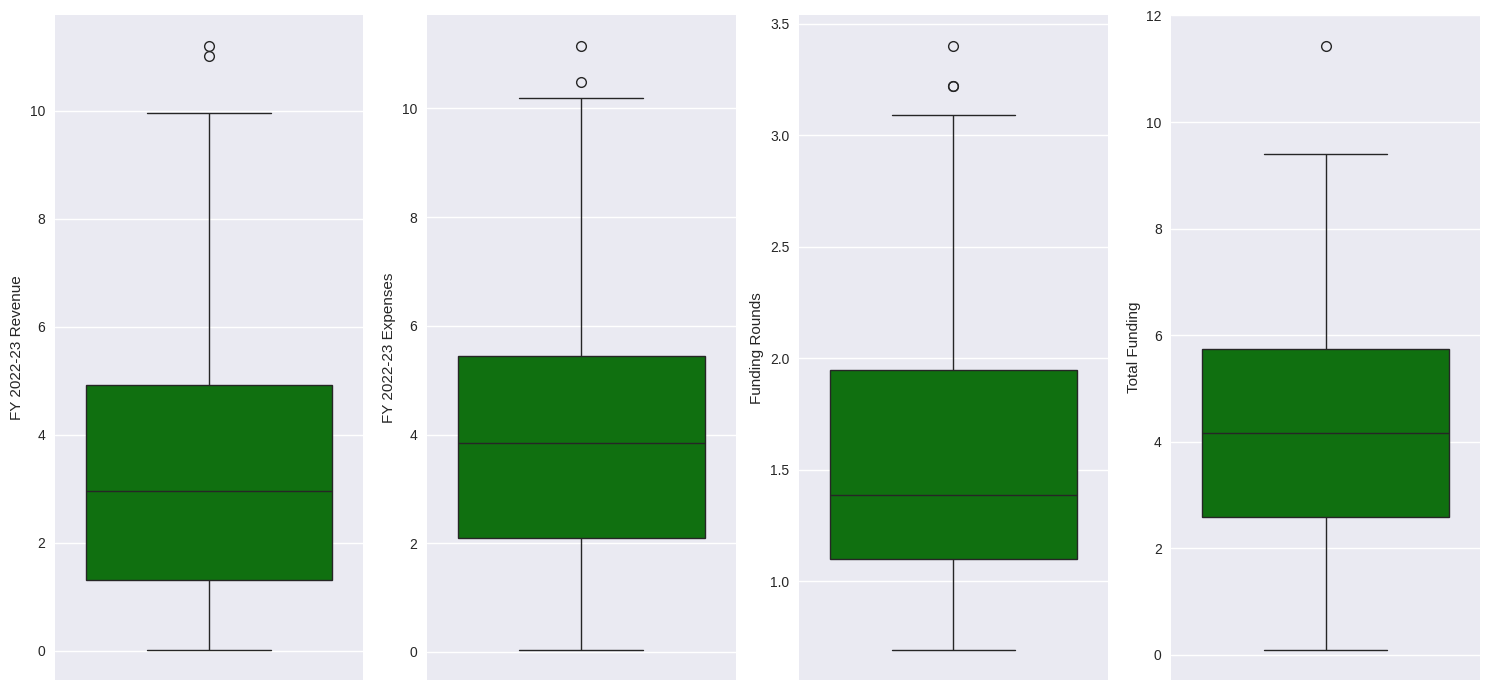

In [ ]:
featuresNumfinal = ['FY 2022-23 Revenue','FY 2022-23 Expenses','Funding Rounds','Total Funding']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

# Modeling

### Drop Unsed Coloumns




In [ ]:
input_file = 'output.csv'
output_file = 'output.csv'

df = pd.read_csv(input_file)

columns_to_drop = ['CompanyName']
df = df.drop(columns=columns_to_drop)

df.to_csv(output_file, index=False)

print(f'Updated data without specified columns saved to {output_file}')



Updated data without specified columns saved to output.csv


### Remove NaN Values

In [ ]:
df.fillna(0, inplace=True)

output_csv = 'output.csv'
df.to_csv(output_csv, index=False)
columns_with_nan = df.columns[df.isnull().any()].tolist()

for col in columns_with_nan:
    print(col)

nan_count_per_column = df.isnull().sum()

##Modelling

In [ ]:
pip install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 9.3 MB/s eta 0:00:00


#Original Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearnex import patch_sklearn  #oneAPI
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

patch_sklearn()
data = pd.read_csv('output.csv')

X = data.drop(columns=['Score B'])
y = data['Score B']

label_encoding_features = ['Headquarters', 'Industry', 'Latest Funding Round']
data = data.drop(columns=['Score A','Score C'])
label_encoder = LabelEncoder()
for col in label_encoding_features:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Mean Squared Error: 0.9596597801173649
R-squared: 0.8473604968724953


#XGBoost Model Creation


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error


data = pd.read_csv('output.csv')

num_features = ['Employees', 'Total Funding', 'Funding Rounds', 'Number of Acquisitions',
                'FY 2022-23 Revenue', 'Profit_Loss', 'FY 2022-23 Expenses',
                'Net Cash Flow From Operations']
cat_features = ['Industry', 'Status', 'Headquarters']
target_variable = 'Score B'


X = data[num_features + cat_features]
y = data[target_variable]


num_scaler = MinMaxScaler()
X[num_features] = num_scaler.fit_transform(X[num_features])


cat_encoder = OneHotEncoder(sparse_output=False)
cat_encoded = cat_encoder.fit_transform(X[cat_features])

X_processed = np.hstack((X[num_features].values, cat_encoded))


X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

model = xgb.train(params, dtrain, num_boost_round=1000)

y_pred = model.predict(dtest)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

model.save_model('xgboost_model.json')


RMSE: 2.6379876528277357


# Working Model using XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearnex import patch_sklearn  # oneAPI
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Patch sklearn with sklearnex for oneAPI
patch_sklearn()

data = pd.read_csv('output.csv')

data['Industry'] = data['Industry'].str.strip().str.replace(',', '', regex=False)


data = data.drop(columns=['Score A', 'Score C', 'Headquarters', 'Founded At', 'Latest Funding Round'])

X = data.drop(columns=['Score B'])
y = data['Score B']

categorical_features = ['Industry', 'Status']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Mean Squared Error: 7.202699486515496
R^2 Score: -0.14563149730418168


#Working Model using GradientBoosting


In [ ]:
import pandas as pd
from sklearnex import patch_sklearn  #oneAPI
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

patch_sklearn()

data = pd.read_csv('output.csv')

data = data.drop(columns=['Score A', 'Score C', 'Headquarters', 'Founded At', 'Latest Funding Round'])

X = data.drop(columns=['Score B'])
y = data['Score B']

categorical_features = ['Industry', 'Status']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Mean Squared Error: 6.075395279305734
R² Score: 0.03367283286270273


#Testing Score B

In [ ]:
new_data = {
    'Headquarters': ['Noida'],
    'Employees': [5010],
    'Industry': ['MedTech'],
    'Founded At': [2020],
    'Status': 1,
    'Total Funding': [102],
    'Funding Rounds': [3],
    'Number of Acquisitions': [1],
    'FY 2022-23 Revenue': [524],
    'Profit_Loss': [120],
    'Latest Funding Round': ['Series B'],
    'FY 2022-23 Expenses': [320],
    'Net Cash Flow From Operations': [420]
}

new_data_df = pd.DataFrame(new_data)
new_data_transformed = preprocessor.transform(new_data_df)

new_prediction = model.predict(new_data_transformed)

print(f'Predicted Score B: {new_prediction[0]}')

Predicted Score B: 6.373873212769783


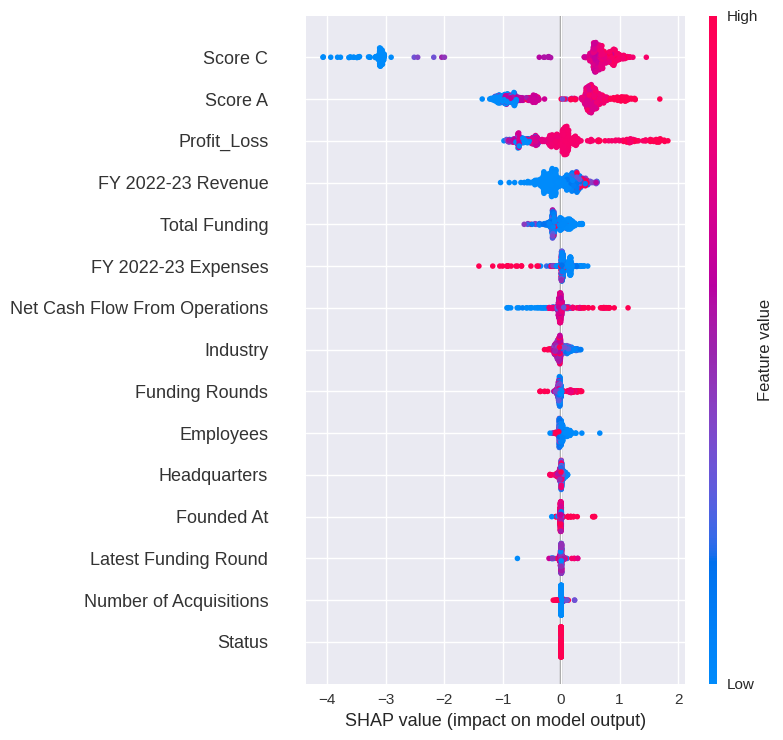

In [ ]:
#!pip install shap
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

# ANN Model

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import L1,L2
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
s = (df.dtypes == 'object')
cat_col = list(s[s].index)

In [ ]:
x,y = df.drop(columns=['Score A', 'Score C', 'Headquarters', 'Founded At', 'Latest Funding Round']), df['Status']
x_train,x_val_test,y_train,y_val_test = train_test_split(x,y,test_size= 0.30,random_state = 42)
x_test,x_val,y_test,y_val = train_test_split(x_val_test,y_val_test,test_size = 0.5,random_state = 42)

In [ ]:
for i in df.columns:
    if df[i].isnull().any():
        nullperc = df[i].isnull().sum()/df.shape[0] * 100
        print(f'null percentage of {i} is {round(nullperc,ndigits=3)}')

In [ ]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)
x_val_sc = sc.fit_transform(x_val)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=35,activation='relu',kernel_initializer='GlorotNormal'))

model.add(Dense(units=100,activation='relu',kernel_initializer='he_normal'))

model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(Dense(units=150,activation='relu',kernel_initializer='he_normal'))

model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(Dense(units=200,activation='relu',kernel_initializer='GlorotNormal'))

model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(Dense(units=1,activation='sigmoid'))


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
              tf.keras.metrics.FalseNegatives()])

In [ ]:
model.fit(x = x_train_sc,y = y_train,epochs = 300,validation_data = (x_test_sc,y_test))

In [ ]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

<Axes: >

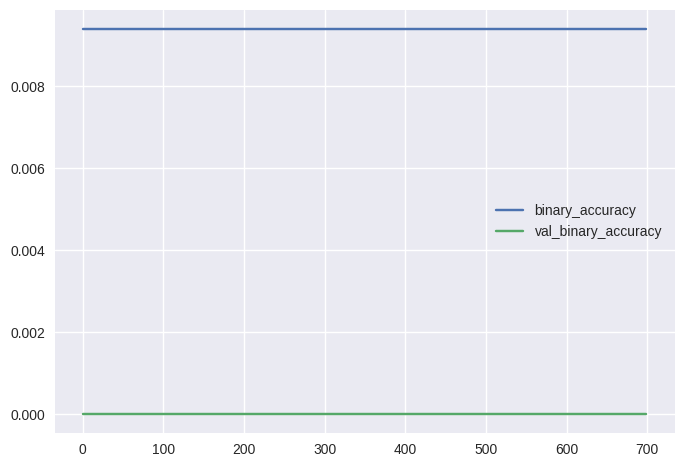

In [ ]:
pd.DataFrame(model.history.history)[['binary_accuracy','val_binary_accuracy']].plot()

In [ ]:
model.evaluate(x_val_sc,y_val)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.0172 - false_negatives: 0.0000e+00 - loss: nan


[nan, 0.010869565419852734, 0.0]

In [ ]:
ypred= (model.predict(x_val_sc) > 0.5).astype("int32")
ypred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
print(classification_report(y_val,ypred))

              precision    recall  f1-score   support

           0       0.01      1.00      0.02         1
           1       0.00      0.00      0.00        91

    accuracy                           0.01        92
   macro avg       0.01      0.50      0.01        92
weighted avg       0.00      0.01      0.00        92



In [ ]:
confusion_matrix(y_val, ypred)

array([[ 1,  0],
       [91,  0]])

# GAN Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

data = pd.read_csv('output.csv')

num_features = ['Employees', 'Total Funding', 'Funding Rounds', 'Number of Acquisitions',
                'FY 2022-23 Revenue', 'Profit_Loss', 'FY 2022-23 Expenses',
                'Net Cash Flow From Operations']
cat_features = ['Industry', 'Status', 'Headquarters']

num_scaler = MinMaxScaler()
data[num_features] = num_scaler.fit_transform(data[num_features])

cat_encoder = OneHotEncoder(sparse_output=False)
cat_encoded = cat_encoder.fit_transform(data[cat_features])

data_processed = np.hstack((data[num_features].values, cat_encoded))

# Set latent dimension
latent_dim = 100

# Build Generator
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(data_processed.shape[1], activation='tanh'))
    return model

# Build Discriminator
def build_discriminator():
    model = Sequential()
    model.add(Dense(128, input_dim=data_processed.shape[1]))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])


discriminator.trainable = False
gan_input = Sequential()
gan_input.add(generator)
gan_input.add(discriminator)
gan_input.compile(loss='binary_crossentropy', optimizer=Adam())

epochs = 600
batch_size = data_processed.shape[0]

for epoch in range(epochs):
    noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
    generated_data = generator.predict(noise)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((generated_data.shape[0], 1))

    d_loss_real = discriminator.train_on_batch(data_processed, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)

    noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
    g_loss = gan_input.train_on_batch(noise, real_labels)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}:")
        print(f"  Discriminator Loss Real: {d_loss_real[0]}, Fake: {d_loss_fake[0]}")
        print(f"  Generator Loss: {g_loss}")

# Save models
generator.save('gan_generator_model.h5')
discriminator.save('gan_discriminator_model.keras')


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 0:
  Discriminator Loss Real: 0.6724587082862854, Fake: 0.7498642802238464
  Generator Loss: [array(0.7498643, dtype=float32), array(0.7498643, dtype=float32), array(0.49261084, dtype=float32)]
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/2

In [ ]:
generator.save('gan_generator_model.keras')
discriminator.save('gan_discriminator_model.keras')

# Score Prediction

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import torch
from tensorflow.keras.models import load_model

xgb_model = xgb.Booster()
xgb_model.load_model('/content/xgboost_model.json')

generator = load_model('/content/gan_generator_model.keras')

noise = torch.randn(1, 100)

synthetic_data = generator.predict(noise.numpy())

dtest = xgb.DMatrix(synthetic_data)

future_pred = xgb_model.predict(dtest)

print(f"Predicted future Score B: {future_pred[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted future Score B: 3.5843801498413086


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

data = pd.read_csv('output.csv')

num_features = ['Employees', 'Total Funding', 'Funding Rounds', 'Number of Acquisitions',
                'FY 2022-23 Revenue', 'Profit_Loss', 'FY 2022-23 Expenses',
                'Net Cash Flow From Operations']
cat_features = ['Industry', 'Status', 'Headquarters']

num_scaler = MinMaxScaler()
data[num_features] = num_scaler.fit_transform(data[num_features])

cat_encoder = OneHotEncoder(sparse_output=False)
cat_encoded = cat_encoder.fit_transform(data[cat_features])

generated_data = generator.predict(noise)

generated_data_inv = num_scaler.inverse_transform(generated_data[:, :len(num_features)])


generated_df = pd.DataFrame(
    data=np.hstack((generated_data_inv, generated_data[:, len(num_features):])),
    columns=num_features + list(cat_encoder.get_feature_names_out())
)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


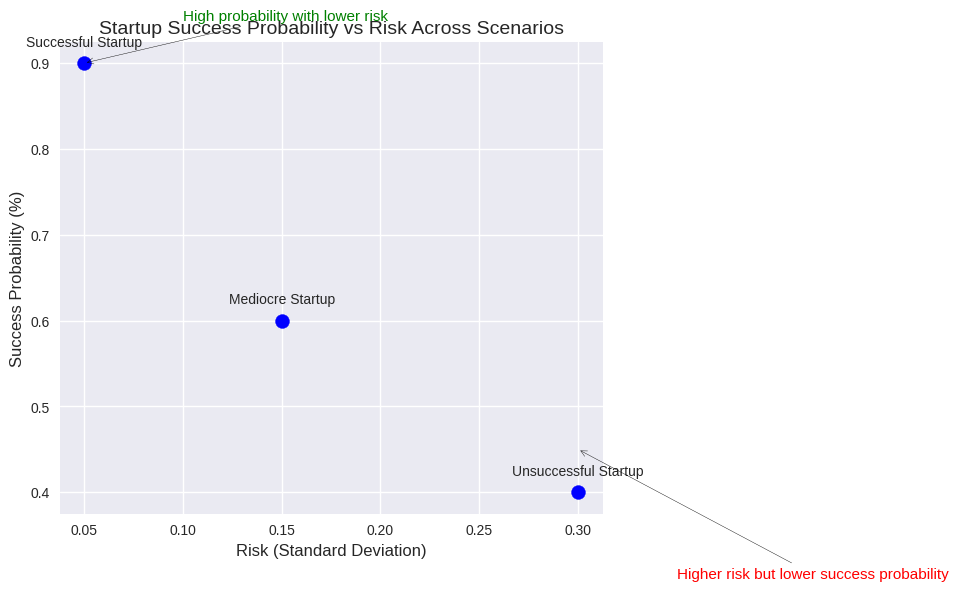

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

scenarios = ['Successful Startup', 'Unsuccessful Startup', 'Mediocre Startup']
success_probabilities = [0.90, 0.40, 0.60]
risks = [0.05, 0.30, 0.15]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(risks, success_probabilities, color='blue', s=100)

ax.set_xlabel('Risk (Standard Deviation)', fontsize=12)
ax.set_ylabel('Success Probability (%)', fontsize=12)

ax.set_title('Startup Success Probability vs Risk Across Scenarios', fontsize=14)

for i, scenario in enumerate(scenarios):
    ax.text(risks[i], success_probabilities[i] + 0.02, scenario, fontsize=10, ha='center')

plt.annotate('Higher risk but lower success probability',
             xy=(0.30, 0.45), xytext=(0.35, 0.3),
             arrowprops=dict(facecolor='red', arrowstyle="->"),
             fontsize=11, color='red')

plt.annotate('High probability with lower risk',
             xy=(0.05, 0.90), xytext=(0.1, 0.95),
             arrowprops=dict(facecolor='green', arrowstyle="->"),
             fontsize=11, color='green')

ax.grid(True)

plt.tight_layout()
plt.show()


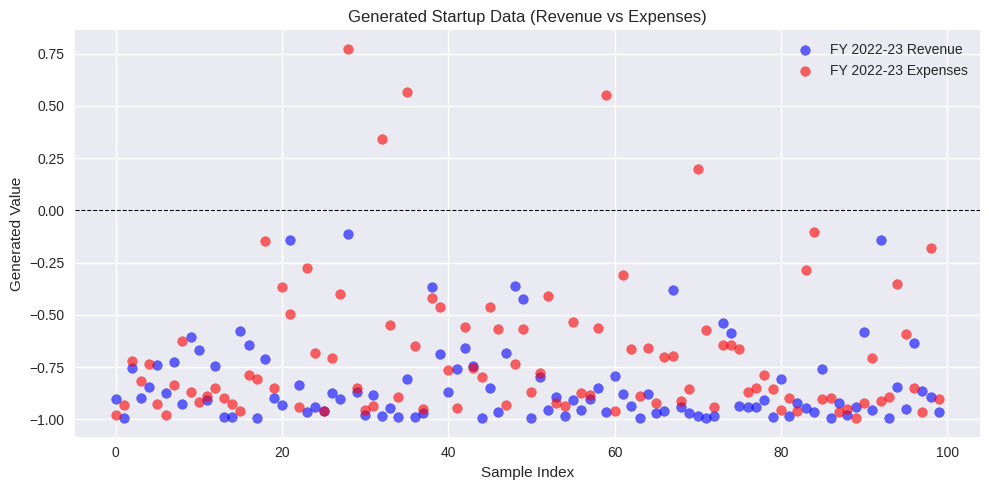

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_generated_data(generator, noise_dim, num_samples=100):
    noise = torch.randn(num_samples, noise_dim)
    generated_data = generator(noise)

    revenue = generated_data[:, 0]
    expenses = generated_data[:, 1]

    plt.figure(figsize=(10, 5))

    plt.scatter(range(num_samples), revenue, label='FY 2022-23 Revenue', color='blue', alpha=0.6)

    plt.scatter(range(num_samples), expenses, label='FY 2022-23 Expenses', color='red', alpha=0.6)

    plt.title('Generated Startup Data (Revenue vs Expenses)')
    plt.xlabel('Sample Index')
    plt.ylabel('Generated Value')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_generated_data(generator, noise_dim=100)


In [ ]:
import numpy as np

def monte_carlo_simulation(scenarios, iterations=1000):
    results = []
    for i in range(iterations):
        scenario = scenarios[np.random.randint(0, len(scenarios))]

        revenue_tweak = scenario['FY 2022-23 Revenue'] * np.random.normal(1, 0.05)
        expense_tweak = scenario['FY 2022-23 Expenses'] * np.random.normal(1, 0.05)

        net_profit = revenue_tweak - expense_tweak
        results.append(net_profit)

    results = np.array(results)

    return {
        'mean_outcome': np.mean(results),
        'success_probability': np.sum(results > 0) / iterations
    }

successful_scenario = {
    'CompanyName': 'Successful Startup',
    'FY 2022-23 Revenue': 2.0,
    'FY 2022-23 Expenses': 0.5
}
unsuccessful_scenario = {
    'CompanyName': 'Unsuccessful Startup',
    'FY 2022-23 Revenue': 0.6,
    'FY 2022-23 Expenses': 0.9
}
mediocre_scenario = {
    'CompanyName': 'Mediocre Startup',
    'FY 2022-23 Revenue': 1.0,
    'FY 2022-23 Expenses': 0.9
}

scenarios = [successful_scenario, unsuccessful_scenario, mediocre_scenario]

for scenario in scenarios:
    result = monte_carlo_simulation([scenario])
    print(f"{scenario['CompanyName']} Monte Carlo Results:")
    print(f"  Mean Outcome (Net Profit): {result['mean_outcome']:.2f}")
    print(f"  Success Probability: {result['success_probability'] * 100:.2f}%")


Successful Startup Monte Carlo Results:
  Mean Outcome (Net Profit): 1.50
  Success Probability: 100.00%
Unsuccessful Startup Monte Carlo Results:
  Mean Outcome (Net Profit): -0.30
  Success Probability: 0.00%
Mediocre Startup Monte Carlo Results:
  Mean Outcome (Net Profit): 0.10
  Success Probability: 93.70%


2024-10-04 23:34:02.987 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:34:03.359 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-04 23:34:03.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:34:03.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:34:03.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:34:03.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:34:03.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-04 23:34:03.386 Session state does not 

DeltaGenerator()

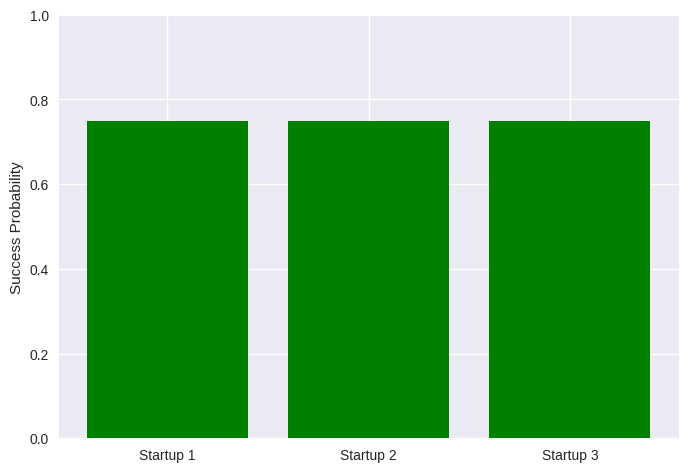

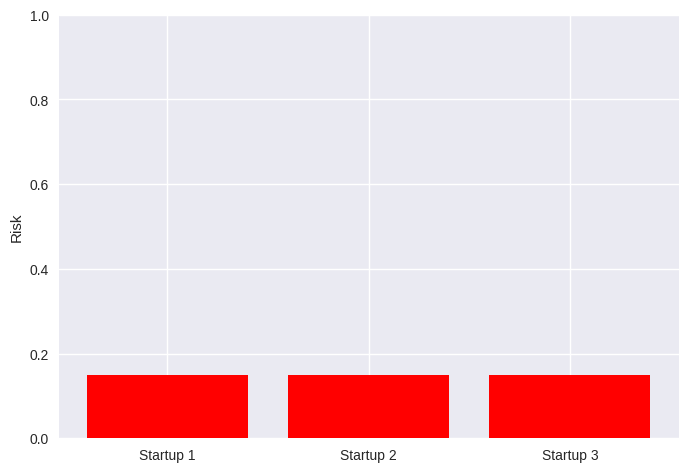

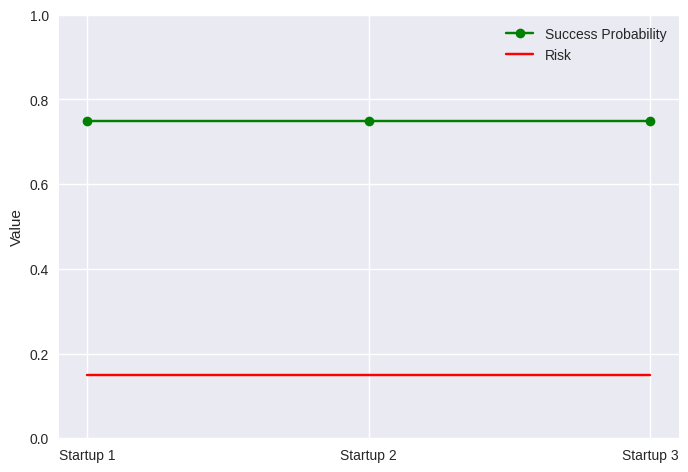

In [ ]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

st.title("Startup Investment Dashboard")

num_startups = st.number_input("Number of Startups", min_value=1, max_value=10, value=3)

company_names = []
success_probabilities = []
risks = []

for i in range(num_startups):
    company_name = st.text_input(f"Company Name {i + 1}", value=f'Startup {i + 1}')
    success_probability = st.slider(f"Success Probability for {company_name}", 0.0, 1.0, 0.75)
    risk = st.slider(f"Risk (Standard Deviation) for {company_name}", 0.0, 1.0, 0.15)

    company_names.append(company_name)
    success_probabilities.append(success_probability)
    risks.append(risk)

st.subheader("Success Probability of Startups")
fig, ax = plt.subplots()
ax.bar(company_names, success_probabilities, color='green')
ax.set_ylabel('Success Probability')
ax.set_ylim(0, 1)
st.pyplot(fig)

st.subheader("Risk (Standard Deviation)")
fig, ax = plt.subplots()
ax.bar(company_names, risks, color='red')
ax.set_ylabel('Risk')
ax.set_ylim(0, 1)
st.pyplot(fig)

st.subheader("Success Probabilities and Risks Line Chart")
fig, ax = plt.subplots()
ax.plot(company_names, success_probabilities, marker='o', label='Success Probability', color='green')
ax.plot(company_names, risks, marker='x', label='Risk', color='red')
ax.set_ylabel('Value')
ax.legend()
ax.set_ylim(0, 1)
st.pyplot(fig)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


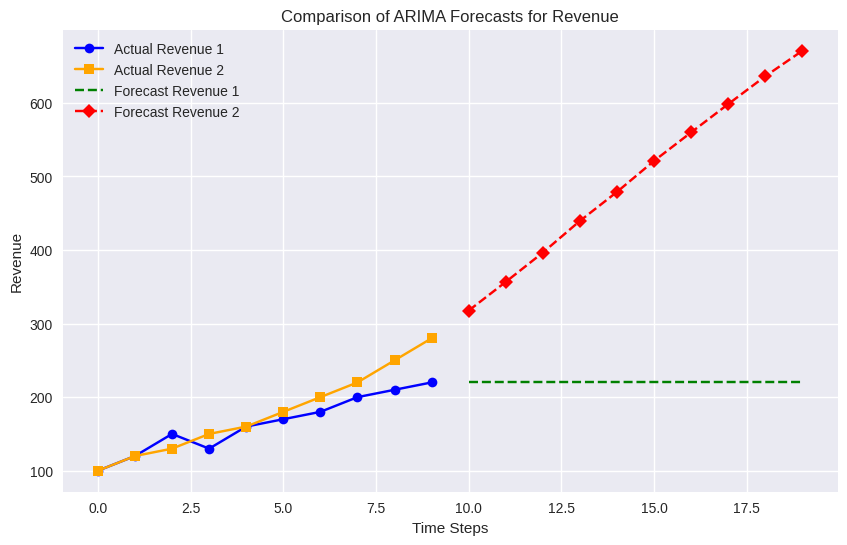

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data_1 = {'Revenue': [100, 120, 150, 130, 160, 170, 180, 200, 210, 220]}
df_1 = pd.DataFrame(data_1)

model_1 = ARIMA(df_1['Revenue'], order=(5, 1, 0))
model_fit_1 = model_1.fit()
forecast_1 = model_fit_1.forecast(steps=10)

data_2 = {'Revenue': [100, 120, 130, 150, 160, 180, 200, 220, 250, 280]}
df_2 = pd.DataFrame(data_2)

model_2 = ARIMA(df_2['Revenue'], order=(5, 1, 0))
model_fit_2 = model_2.fit()
forecast_2 = model_fit_2.forecast(steps=10)

plt.figure(figsize=(10, 6))
plt.plot(df_1['Revenue'], label='Actual Revenue 1', marker='o', linestyle='-', color='blue')
plt.plot(df_2['Revenue'], label='Actual Revenue 2', marker='s', linestyle='-', color='orange')

forecast_index_1 = range(len(df_1), len(df_1) + len(forecast_1))
plt.plot(forecast_index_1, forecast_1, label='Forecast Revenue 1', marker='x', linestyle='--', color='green')

forecast_index_2 = range(len(df_2), len(df_2) + len(forecast_2))
plt.plot(forecast_index_2, forecast_2, label='Forecast Revenue 2', marker='D', linestyle='--', color='red')

plt.title('Comparison of ARIMA Forecasts for Revenue')
plt.xlabel('Time Steps')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()


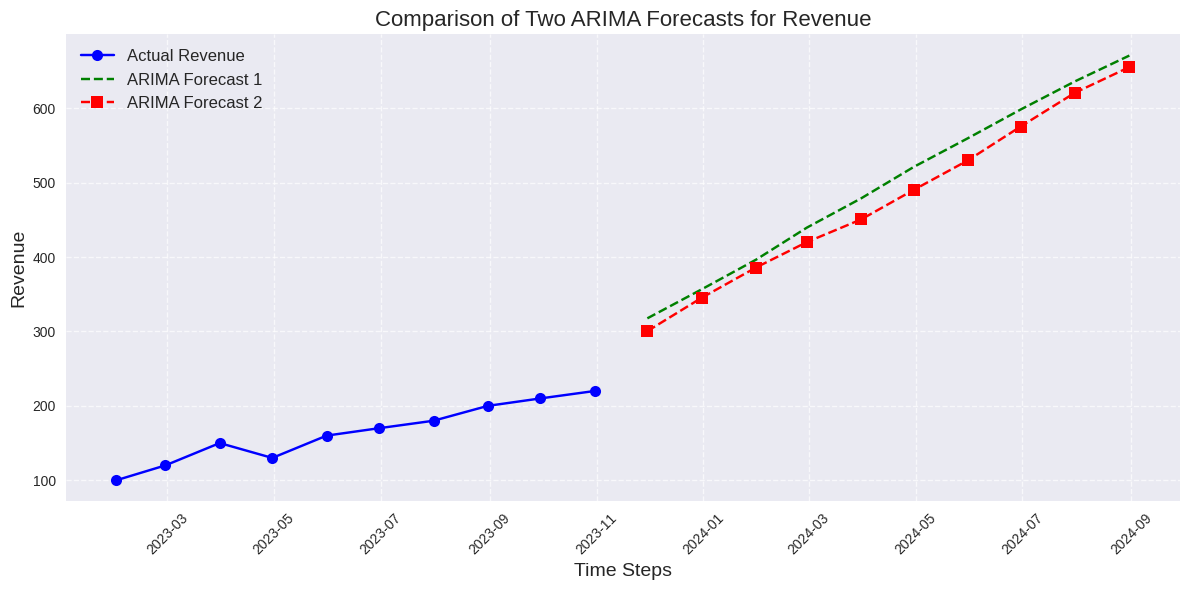

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (Replace with your actual data)
# Let's assume you have two different sets of revenue forecasts

actual_revenue = pd.Series([100, 120, 150, 130, 160, 170, 180, 200, 210, 220])

forecast_1 = pd.Series([317.65, 356.63, 396.46, 439.54, 478.94, 521.14, 559.86, 598.31, 636.17, 670.80],
                       index=range(len(actual_revenue), len(actual_revenue) + 10))

forecast_2 = pd.Series([300.45, 345.28, 385.94, 420.10, 450.62, 490.32, 530.10, 575.46, 620.90, 655.30],
                       index=range(len(actual_revenue), len(actual_revenue) + 10))

time_steps = pd.date_range(start='2023-01-01', periods=len(actual_revenue) + len(forecast_1), freq='M')

plt.figure(figsize=(12, 6))

plt.plot(time_steps[:len(actual_revenue)], actual_revenue, label='Actual Revenue', marker='o', linestyle='-', color='blue', markersize=8)

plt.plot(time_steps[len(actual_revenue):len(actual_revenue) + len(forecast_1)], forecast_1,
         label='ARIMA Forecast 1', marker='x', linestyle='--', color='green', markersize=8)

plt.plot(time_steps[len(actual_revenue):len(actual_revenue) + len(forecast_2)], forecast_2,
         label='ARIMA Forecast 2', marker='s', linestyle='--', color='red', markersize=8)

plt.title('Comparison of Two ARIMA Forecasts for Revenue', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


### Testing Data For Classifiers

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('output.csv')
data=data.drop(columns=['Score A','Score C'])
X = data.drop(columns=['Score B'])
y = data['Score B']

label_encoding_features = ['Headquarters', 'Industry', 'Latest Funding Round','Status']

label_encoder = LabelEncoder()
for col in label_encoding_features:
    X[col] = label_encoder.fit_transform(X[col])

median_expense = y.median()
y = (y > median_expense).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.6311475409836066
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.72      0.65        58
           1       0.69      0.55      0.61        64

    accuracy                           0.63       122
   macro avg       0.64      0.64      0.63       122
weighted avg       0.64      0.63      0.63       122



In [ ]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (487, 13)
Shape of the y Train : (487,)
Shape of the X test : (122, 13)
Shape of the y test : (122,)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

## XGBoost Classifier

Training Accuracy : 1.0
Testing Accuracy : 0.5901639344262295


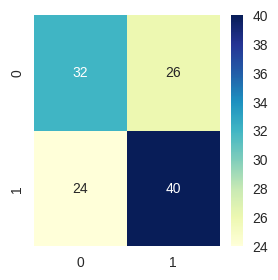

              precision    recall  f1-score   support

           0       0.57      0.55      0.56        58
           1       0.61      0.62      0.62        64

    accuracy                           0.59       122
   macro avg       0.59      0.59      0.59       122
weighted avg       0.59      0.59      0.59       122

------------------------------------------
ROC Curves              = 0.5883620689655172
Precision-Recall Curves = 0.7138909587680079


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

y_predicted_xgb = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))

cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_xgb)
f1 = f1_score(y_test, y_predicted_xgb)
Precision_Recall_xgb = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_xgb)

## GradientBoosting Classifier

Training Accuracy : 1.0
Testing Accuracy : 0.5737704918032787


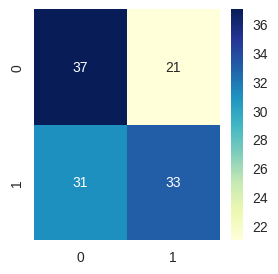

              precision    recall  f1-score   support

           0       0.54      0.64      0.59        58
           1       0.61      0.52      0.56        64

    accuracy                           0.57       122
   macro avg       0.58      0.58      0.57       122
weighted avg       0.58      0.57      0.57       122

------------------------------------------
ROC Curves              = 0.5767780172413793
Precision-Recall Curves = 0.6904172358834245


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.02,
                    max_depth=4,
                    random_state=100, n_estimators=1000)


gbc.fit(X_train,y_train)

y_predicted_gb = gbc.predict(X_test)

print("Training Accuracy :", gbc.score(X_train, y_train))
print("Testing Accuracy :", gbc.score(X_test, y_test))

cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_gb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_gb)
f1 = f1_score(y_test, y_predicted_gb)
Precision_Recall_gbs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_gbs)

## AdaBoost Classifier

Training Accuracy : 0.7597535934291582
Testing Accuracy : 0.5901639344262295


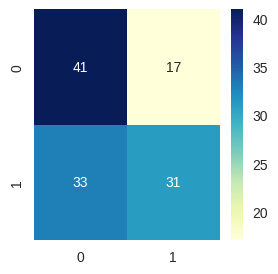

              precision    recall  f1-score   support

           0       0.55      0.71      0.62        58
           1       0.65      0.48      0.55        64

    accuracy                           0.59       122
   macro avg       0.60      0.60      0.59       122
weighted avg       0.60      0.59      0.59       122

roc_auc 0.595635775862069
------------------------------------------
ROC Curves              = 0.595635775862069
Precision-Recall Curves = 0.700350068306011


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#train
ada = AdaBoostClassifier()


ada.fit(X_train,y_train)

#predict
y_predicted_ab = ada.predict(X_test)

print("Training Accuracy :", ada.score(X_train, y_train))
print("Testing Accuracy :", ada.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_ab)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_ab)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_ab)
f1 = f1_score(y_test, y_predicted_ab)
Precision_Recall_abs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_abs)

## Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.5983606557377049


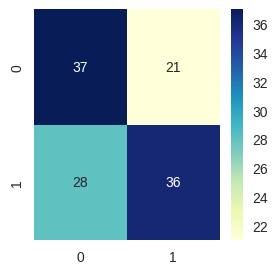

              precision    recall  f1-score   support

           0       0.57      0.64      0.60        58
           1       0.63      0.56      0.60        64

    accuracy                           0.60       122
   macro avg       0.60      0.60      0.60       122
weighted avg       0.60      0.60      0.60       122

------------------------------------------
ROC Curves              = 0.6002155172413793
Precision-Recall Curves = 0.7117935720448663


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

# Reinforced learning

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn

num_samples = 1000
input_dim = 12
batch_size = 32
input_features = torch.randn(num_samples, input_dim)
scaler = MinMaxScaler()
input_features = scaler.fit_transform(input_features)
input_features = torch.FloatTensor(input_features)
success_labels = torch.randint(0, 2, (num_samples, 1)).float()
dataset = TensorDataset(input_features, success_labels)
real_data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

from torch.utils.data import DataLoader, TensorDataset

num_samples = 1000
input_features = torch.randn(num_samples, input_dim)
success_labels = torch.randint(0, 2, (num_samples, 1)).float()

dataset = TensorDataset(input_features, success_labels)
real_data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [ ]:
def wasserstein_loss(fake_data, real_data):
    return torch.mean(fake_data) - torch.mean(real_data)

def gradient_penalty(discriminator, real_data, fake_data):
    alpha = torch.rand(real_data.size(0), 1).expand_as(real_data)
    interpolates = (alpha * real_data + ((1 - alpha) * fake_data)).requires_grad_(True)
    d_interpolates = discriminator(interpolates)
    fake = torch.ones(real_data.size(0), 1).to(real_data.device)
    gradients = torch.autograd.grad(outputs=d_interpolates, inputs=interpolates,
                                    grad_outputs=fake, create_graph=True, retain_graph=True)[0]
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty


In [ ]:
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(input_dim)
optimizer_g = torch.optim.Adam(generator.parameters(), lr=0.0002)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=0.0002)
lambda_gp = 10

for epoch in range(num_epochs):
    for real_data, _ in real_data_loader:
        real_data = real_data.float()

        optimizer_d.zero_grad()
        noise = torch.randn(batch_size, input_dim)
        fake_data = generator(noise)

        real_loss = torch.mean(discriminator(real_data))
        fake_loss = torch.mean(discriminator(fake_data))
        loss_d = wasserstein_loss(fake_loss, real_loss)

        gp = gradient_penalty(discriminator, real_data, fake_data)
        loss_d += lambda_gp * gp

        loss_d.backward()
        optimizer_d.step()

        optimizer_g.zero_grad()
        noise = torch.randn(batch_size, input_dim)
        fake_data = generator(noise)
        loss_g = -torch.mean(discriminator(fake_data))

        loss_g.backward()
        optimizer_g.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], D Loss: {loss_d.item():.4f}, G Loss: {loss_g.item():.4f}')

In [ ]:
import numpy as np

actions = ['Raise Funds', 'Expand', 'Cut Costs']
states = {0: 'Low Cash', 1: 'Stable Cash', 2: 'Growing Revenue', 3: 'Expanding Market', 4: 'Competitor Pressure', 5: 'High Burn Rate'}

Q = np.zeros((len(states), len(actions)))

alpha = 0.1
gamma = 0.9
epsilon = 0.1

def choose_action(Q, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(len(actions))
    else:
        return np.argmax(Q[state, :])

def take_action(state, action):
    if action == 0:
        next_state = np.random.choice([1, 2])
        reward = 10
    elif action == 1:
        next_state = np.random.choice([3, 4])
        reward = 20
    elif action == 2:
        next_state = np.random.choice([2, 5])
        reward = 5

    return next_state, reward

initial_state = 0
success_probabilities = []

for episode in range(1000):
    state = initial_state
    probability = 1
    for step in range(100):
        action = choose_action(Q, state, epsilon)
        next_state, reward = take_action(state, action)

        scenario = {'state': state, 'action': actions[action]}
        scenario_tensor = torch.FloatTensor([0.0] * input_dim)
        future_scenario = generator(scenario_tensor)
        success_probability = future_scenario.item()

        probability *= success_probability
        state = next_state

    success_probabilities.append(probability)

avg_success_prob = np.mean(success_probabilities)
print(f"Average Success Probability: {avg_success_prob:.4f}")

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
    noise = torch.randn(100, input_dim)
    fake_outputs = generator(noise)

plt.hist(fake_outputs.numpy(), bins=30)
plt.title('Histogram of Generated Success Probabilities')
plt.xlabel('Success Probability')
plt.ylabel('Frequency')
plt.show()


# Summary

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

scores = {
                 'GradientBoosting Classifier':  {
                             'precision_score': precision_score(y_test, y_predicted_gb),
                             'recall_score': recall_score(y_test, y_predicted_gb)
                         },
                 'Adaboost Classifier':  {
                             'precision_score': precision_score(y_test, y_predicted_ab),
                             'recall_score': recall_score(y_test, y_predicted_ab)
                         },
                 'XGBoost':  {
                             'precision_score': precision_score(y_test, y_predicted_xgb),
                             'recall_score': recall_score(y_test, y_predicted_xgb)
                         },
                 'Random Forest':  {
                             'precision_score': precision_score(y_test, y_pred_rf),
                            'recall_score': recall_score(y_test, y_pred_rf)
                         }
            }

In [ ]:
from sklearn.metrics import precision_score


Precision_Recall = {

                 'GradientBoosting Classifier':  {
                             'Precision_Recall': Precision_Recall_gbs
                         },
                 'Adaboost Classifier':  {
                             'Precision_Recall': Precision_Recall_abs
                         },
                 'XGBoost':  {
                             'Precision_Recall': Precision_Recall_xgb
                         },
                 'Random Forest':  {
                             'Precision_Recall': Precision_Recall_rfs
                         }
            }

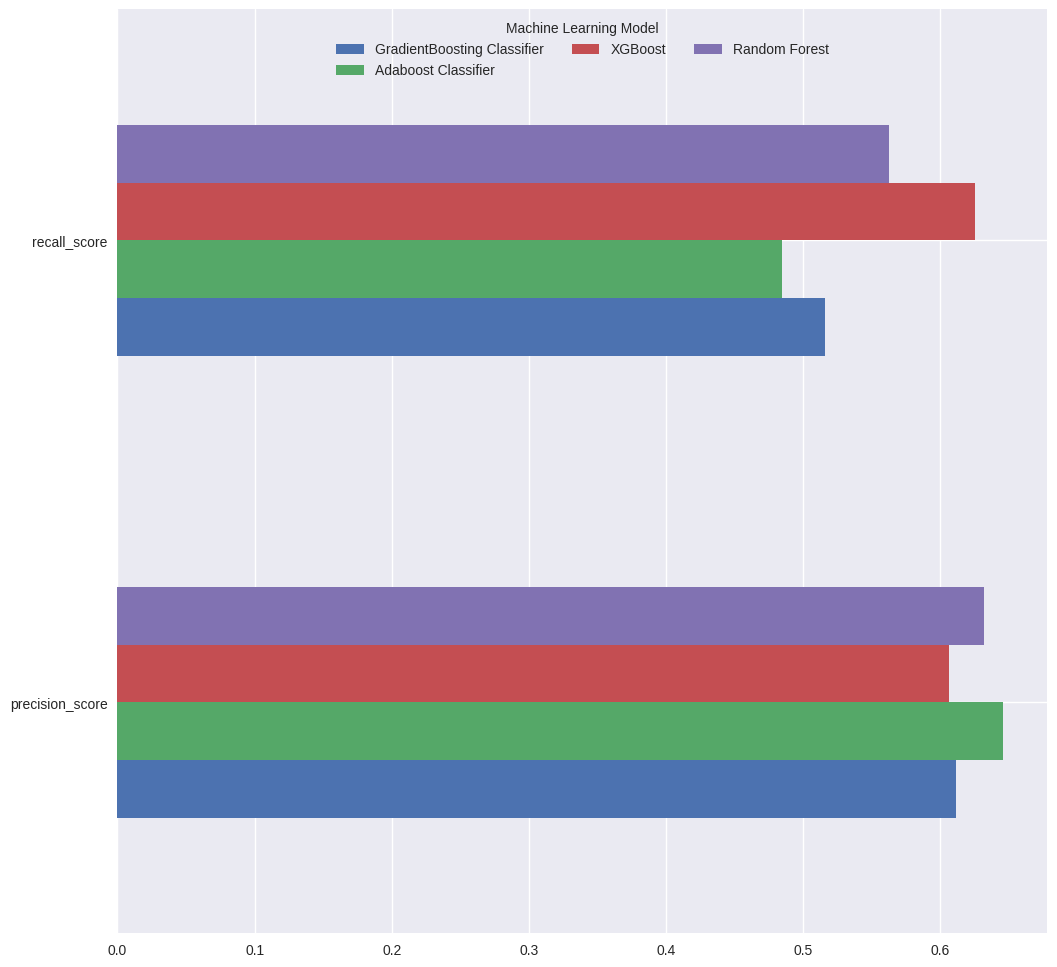

In [ ]:
scores = pd.DataFrame(scores)


scores.plot(kind="barh",figsize=(12, 12)).legend(loc='upper center', ncol=3, title="Machine Learning Model")

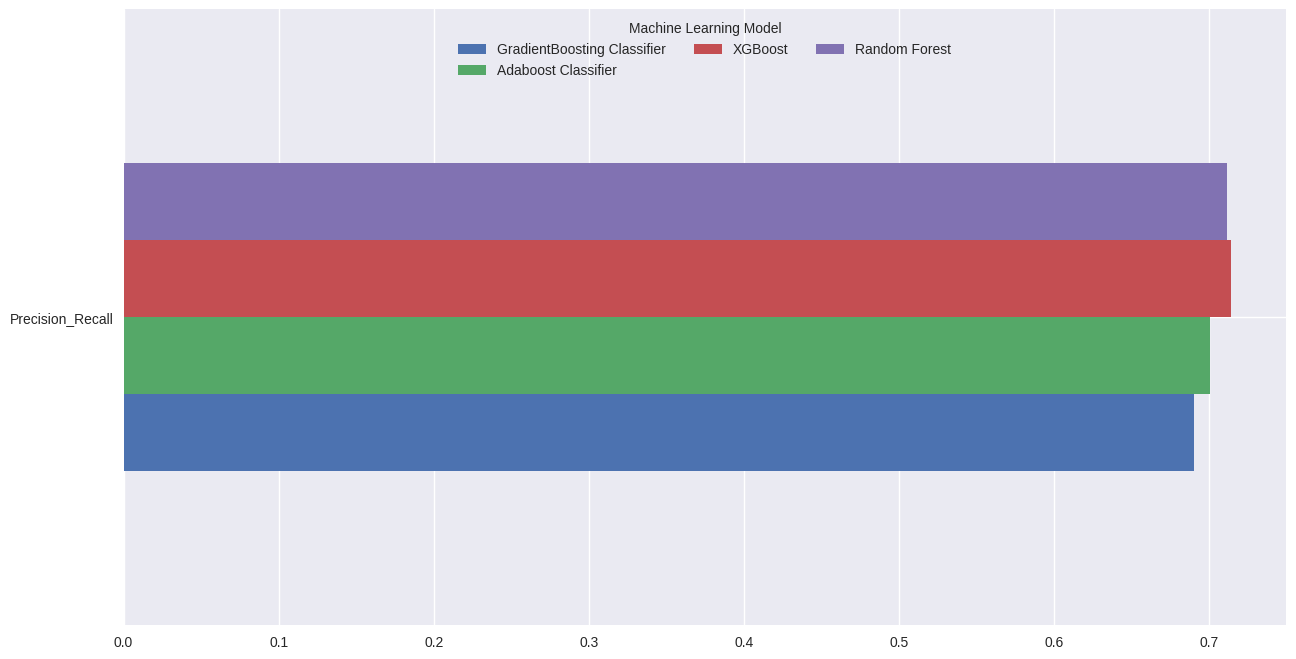

In [ ]:
Precision_Recall = pd.DataFrame(Precision_Recall)


Precision_Recall.plot(kind="barh",figsize=(15, 8)).legend(loc='upper center', ncol=3, title="Machine Learning Model")